In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import math

$\mu_0=\text{Taxa de transmissão de boas notícias, por post, por usuário (recuperação endógena), aka } \alpha$

$\mu_1=\text{Taxa de transmissão de fake news, por post, por usuário (infecção endógena), aka } \beta$

$\lambda_0=\text{Taxa de recuperação exógena por nó, aka } \gamma$

$\lambda_1=\text{Taxa de infecção exógena por nó, aka } \varepsilon$

$N=\text{Tamanho da população}$

Em $K=1$, vamos usar somente $\mu_1$ e $\lambda_0$.

$b(i)=\frac{\mu_1 i(N-i)}{N} + \lambda_1 (N-i)$

$d(i)=\lambda_0 i + \frac{\mu_0 (N-i)i}{N}$

$
  Q_{i,j} = 
     \begin{cases}
      b(i),\text{ se }j=i+1 \\
      d(i),\text{ se }j=i-1 \\
      1-(b(i)+d(i)),\text{ se }j=i
     \end{cases}
$

In [9]:
beta = 0.5
gamma = 0.1
epsilon = 0
alpha = 0
n = 150
max_t = 50
initial_infected = 10

Q = np.zeros([n+1, n+1])

for i in range(n+1):
  for j in range(n+1):
    b = beta*i*(n-i)/n + epsilon*(n-i)
    d = gamma*i        + alpha*(n-i)*i/n
    if j==i-1:
      Q[i,j]=d
    elif j==i+1:
      Q[i,j]=b

for i in range(n+1):
  Q[i,i] = -sum(Q[i,:])

$P(t) = e^{tQ}$

A função de transição $P(t)$ é usada para calcular o valor esperado de $X_t$.

$I_0 = \text{número de infectados inicial}$

$E(X_t|X_0=I_0) = \sum_j j*P(X_t=j|X_0=I_0) $

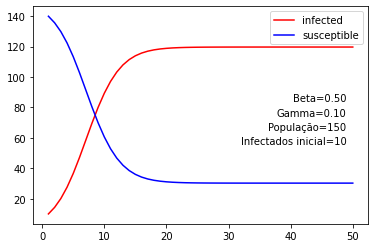

In [14]:
def meanLoop(Q, max_t, n, t=0, initial_infected=1, infected=1, history=[], times=[]):
  history.append(infected)
  times.append(t)
  if t>=max_t:
    return (history, times)
  # P(t) = e^{tQ}
  # A função de transição P(t) é usada para calcular o valor esperado de X_t
  P = expm(t*Q)

  # E(X_t|X_0=I_0) = sum{ j*P(X_t=j|X_0=I_0) }
  terms = [j * P[initial_infected,j] for j in range(n+1)]
  expected_value = sum(terms)

  # Usamos o valor esperado calculado para calcular para t+1
  return meanLoop(Q, max_t, n, t+1, initial_infected, expected_value, history, times)

(history, times) = meanLoop(Q, max_t, n, t=1, initial_infected=initial_infected, infected=initial_infected, history=[])

#print(history)
susceptible=[n-i for i in history]

plt.plot(times, history, 'r', label='infected')
plt.plot(times, susceptible, 'b', label='susceptible')
plt.legend()

plt.figtext(0.85, 0.55, "Beta=%.2f" % (beta), ha="right")
plt.figtext(0.85, 0.5, "Gamma=%.2f" % (gamma), ha="right")
plt.figtext(0.85, 0.45, "População=%d" % (n), ha="right")
plt.figtext(0.85, 0.4, "Infectados inicial=%d" % (initial_infected), ha="right")
plt.show()

In [13]:
## Loop de simulação usando Q. A princípio ignorar
def simulate(Q, max_t, n, t=1, infected=1, history=[]):
  history.append(infected)
  if t>=max_t:
    return history
  P = expm(t*Q)
  new_infected = np.random.choice(range(n+1), p=P[initia_infected,:])
  return simulate(Q, max_t, n, t+1, new_infected, history)

[1, 15, 17, 22, 35, 50, 72, 73, 51, 78, 90, 112, 121, 108, 121, 110, 117, 117, 132, 120, 119, 108, 109, 117, 129, 119, 126, 114, 121, 122, 122, 117, 109, 127, 124, 117, 123, 121, 124, 122, 119, 119, 130, 126, 124, 126, 117, 120, 122, 130]


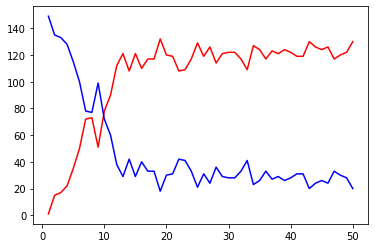

In [8]:
history=simulate(Q, max_t, n, t=1, infected=1, history=[])
print(history)
susceptible=[n-i for i in history]

plt.plot(range(1,max_t+1), history, 'r')
plt.plot(range(1,max_t+1), susceptible, 'b')
plt.show()